In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
import seaborn as sns
from tqdm import *

In [3]:
num_vectors = 1000
num_clusters = 3
num_steps = 1000

In [4]:
# dataset
vector_values = []
for i in range(num_vectors):
    if np.random.random() > 0.5:
        vector_values.append([np.random.normal(0.5, 0.6),np.random.normal(0.3, 0.9)])
    else:
        vector_values.append([np.random.normal(2.5, 0.4),np.random.normal(0.8, 0.5)])

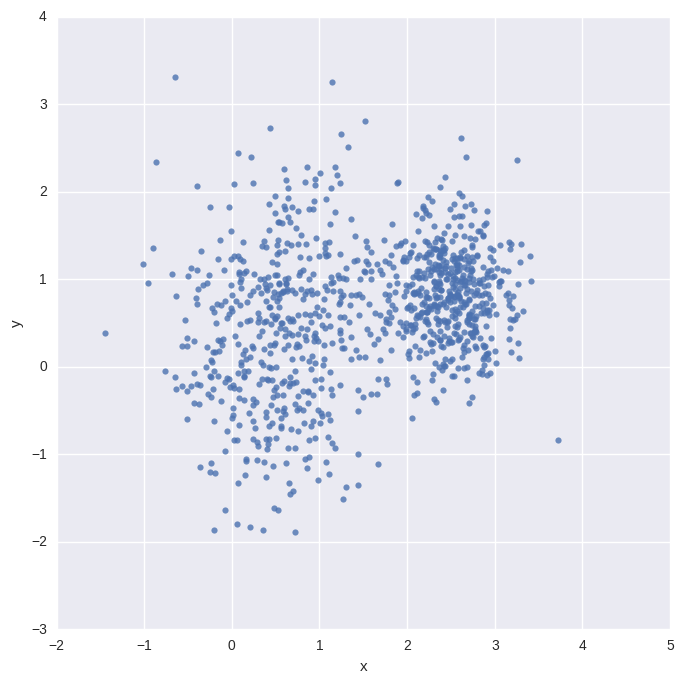

In [5]:
df = pd.DataFrame({"x": [v[0] for v in vector_values], 
                   "y": [v[1] for v in vector_values]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=7)
plt.show()

In [6]:
len(vector_values)

1000

In [7]:
vectors = tf.constant(vector_values)
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [num_clusters,-1]))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())

(1, 1000, 2)
(3, 1, 2)


In [9]:
distances = tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)

In [10]:
means = tf.concat(0, [
  tf.reduce_mean(
      tf.gather(vectors, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1])
  for c in range(num_clusters)])

update_centroids = tf.assign(centroids, means)

In [11]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

In [12]:
for step in tqdm(range(num_steps)):
   _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])

print("centroids")
print(centroid_values)

100%|ââââââââââ| 1000/1000 [00:00<00:00, 1268.40it/s]

centroids
[[ 0.4332934  -0.40195051]
 [ 2.46694422  0.82165062]
 [ 0.60367262  1.10439253]]


In [13]:
data = {"x": [], "y": [], "cluster": []}
for i in range(len(assignment_values)):
    data["x"].append(vector_values[i][0])
    data["y"].append(vector_values[i][1])
    data["cluster"].append(assignment_values[i])

In [14]:
df = pd.DataFrame(data)

In [15]:
df.head()

,cluster,x,y
0,1,2.097266,0.560534
1,1,2.564401,1.191413
2,0,0.874929,-0.839407
3,2,-0.633556,0.808190
4,0,-0.032660,-0.143415


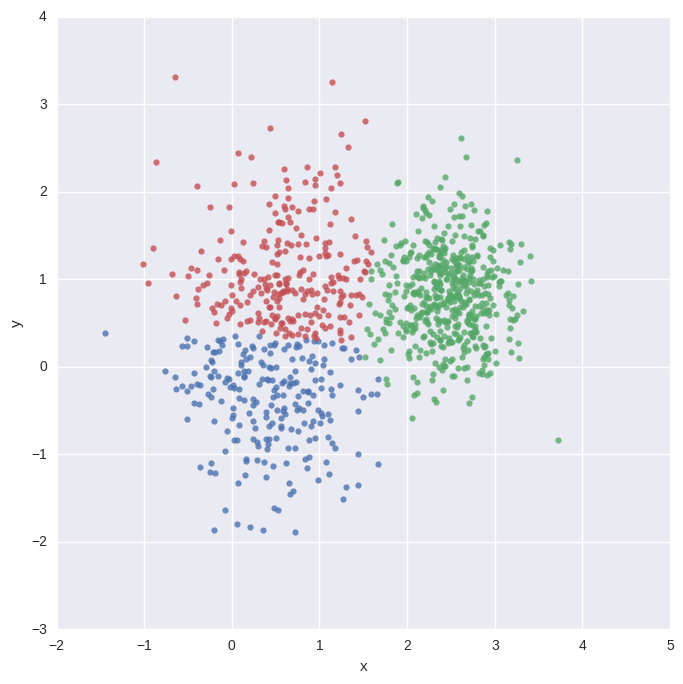

In [16]:
sns.lmplot("x", "y", data=df, 
           fit_reg=False, size=7, 
           hue="cluster", legend=False)
plt.show()

In [17]:
sess.close()